# WATER QUALITY PREDICTION - P N MEENA, GOKULDAS P V

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.image as pltimg


https://www.kaggle.com/datasets/mssmartypants/water-quality

In [2]:
data = pd.read_csv(r"C:\Users\meena\OneDrive\Desktop\waterQuality1.csv")

In [3]:
data

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05      0.20  ...  0.054     16.08      1.13    0.007   
1       0.66      0.90      0.65  ...  0.100      2.01      1.93    0.003   
2       0.02      0.99      0.05  ...  0.078     14.16      1.11    0.006   
3       1.66      1.08      0.71  ...  0.016      1.41      1.29    0.004   
4       0.57      0.61      0.13  ...  0.117      6.74      1.11    0.003   
...      ...       ...       ...  ...    ...       ...       ...      ...   
7994    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
7995    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
7996    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
7997    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
7998    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
0           37.75    6.78      0.08    0.34     0.02        1  
1           32.26    3.21      0.08    0.27     0.05        1  
2           50.28    7.07      0.07    0.44     0.01        0  
3            9.12    1.72      0.02    0.45     0.05        1  
4           16.90    2.41      0.02    0.06     0.02        1  
...           ...     ...       ...     ...      ...      ...  
7994         3.57    2.13      0.09    0.06     0.03        1  
7995         1.48    1.11      0.09    0.10     0.08        1  
7996         1.35    4.84      0.00    0.04     0.05        1  
7997         0.00    0.00      0.00    0.00     0.00        1  
7998         1.35    4.84      0.00    0.04     0.05        1  

[7999 rows x 21 columns]

In [4]:
data["is_safe"].value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

In [5]:
data.drop(data[data['is_safe'] == '#NUM!'].index, inplace = True)
data

aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  \
0          1.65    9.08     0.04    2.85    0.007        0.35      0.83   
1          2.32   21.16     0.01    3.31    0.002        5.28      0.68   
2          1.01   14.02     0.04    0.58    0.008        4.24      0.53   
3          1.36   11.33     0.04    2.96    0.001        7.23      0.03   
4          0.92   24.33     0.03    0.20    0.006        2.67      0.69   
...         ...     ...      ...     ...      ...         ...       ...   
7994       0.05    7.78     0.00    1.95    0.040        0.10      0.03   
7995       0.05   24.22     0.02    0.59    0.010        0.45      0.02   
7996       0.09    6.85     0.00    0.61    0.030        0.05      0.05   
7997       0.01      10     0.01    2.00    0.000        2.00      0.00   
7998       0.04    6.85     0.01    0.70    0.030        0.05      0.01   

      copper  flouride  bacteria  ...   lead  nitrates  nitrites  mercury  \
0       0.17      0.05      0.20  ...  0.054     16.08      1.13    0.007   
1       0.66      0.90      0.65  ...  0.100      2.01      1.93    0.003   
2       0.02      0.99      0.05  ...  0.078     14.16      1.11    0.006   
3       1.66      1.08      0.71  ...  0.016      1.41      1.29    0.004   
4       0.57      0.61      0.13  ...  0.117      6.74      1.11    0.003   
...      ...       ...       ...  ...    ...       ...       ...      ...   
7994    0.03      1.37      0.00  ...  0.197     14.29      1.00    0.005   
7995    0.02      1.48      0.00  ...  0.031     10.27      1.00    0.001   
7996    0.02      0.91      0.00  ...  0.182     15.92      1.00    0.000   
7997    0.09      0.00      0.00  ...  0.000      0.00      0.00    0.000   
7998    0.03      1.00      0.00  ...  0.182     15.92      1.00    0.000   

      perchlorate  radium  selenium  silver  uranium  is_safe  
0           37.75    6.78      0.08    0.34     0.02        1  
1           32.26    3.21      0.08    0.27     0.05        1  
2           50.28    7.07      0.07    0.44     0.01        0  
3            9.12    1.72      0.02    0.45     0.05        1  
4           16.90    2.41      0.02    0.06     0.02        1  
...           ...     ...       ...     ...      ...      ...  
7994         3.57    2.13      0.09    0.06     0.03        1  
7995         1.48    1.11      0.09    0.10     0.08        1  
7996         1.35    4.84      0.00    0.04     0.05        1  
7997         0.00    0.00      0.00    0.00     0.00        1  
7998         1.35    4.84      0.00    0.04     0.05        1  

[7996 rows x 21 columns]

In [6]:
water_data = data.astype(float)

In [7]:
water_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [8]:
water_data.describe()

aluminium      ammonia      arsenic       barium      cadmium  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.666396    14.278212     0.161477     1.567928     0.042803   
std       1.265323     8.878930     0.252632     1.216227     0.036049   
min       0.000000    -0.080000     0.000000     0.000000     0.000000   
25%       0.040000     6.577500     0.030000     0.560000     0.008000   
50%       0.070000    14.130000     0.050000     1.190000     0.040000   
75%       0.280000    22.132500     0.100000     2.482500     0.070000   
max       5.050000    29.840000     1.050000     4.940000     0.130000   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  ...   
mean      2.177589     0.247300     0.805940     0.771646     0.319714  ...   
std       2.567210     0.270663     0.653595     0.435423     0.329497  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.100000     0.050000     0.090000     0.407500     0.000000  ...   
50%       0.530000     0.090000     0.750000     0.770000     0.220000  ...   
75%       4.240000     0.440000     1.390000     1.160000     0.610000  ...   
max       8.680000     0.900000     2.000000     1.500000     1.000000  ...   

              lead     nitrates     nitrites      mercury  perchlorate  \
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000   
mean      0.099431     9.819250     1.329846     0.005193    16.465266   
std       0.058169     5.541977     0.573271     0.002967    17.688827   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.048000     5.000000     1.000000     0.003000     2.170000   
50%       0.102000     9.930000     1.420000     0.005000     7.745000   
75%       0.151000    14.610000     1.760000     0.008000    29.487500   
max       0.200000    19.830000     2.930000     0.010000    60.010000   

            radium     selenium       silver      uranium      is_safe  
count  7996.000000  7996.000000  7996.000000  7996.000000  7996.000000  
mean      2.920106     0.049684     0.147811     0.044672     0.114057  
std       2.322805     0.028773     0.143569     0.026906     0.317900  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.820000     0.020000     0.040000     0.020000     0.000000  
50%       2.410000     0.050000     0.080000     0.050000     0.000000  
75%       4.670000     0.070000     0.240000     0.070000     0.000000  
max       7.990000     0.100000     0.500000     0.090000     1.000000  

[8 rows x 21 columns]

In [9]:
water_data["is_safe"].value_counts()

0.0    7084
1.0     912
Name: is_safe, dtype: int64

In [10]:
water_data.isnull().values.any()

False

In [11]:
water_data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

# Exploratory Data Analysis

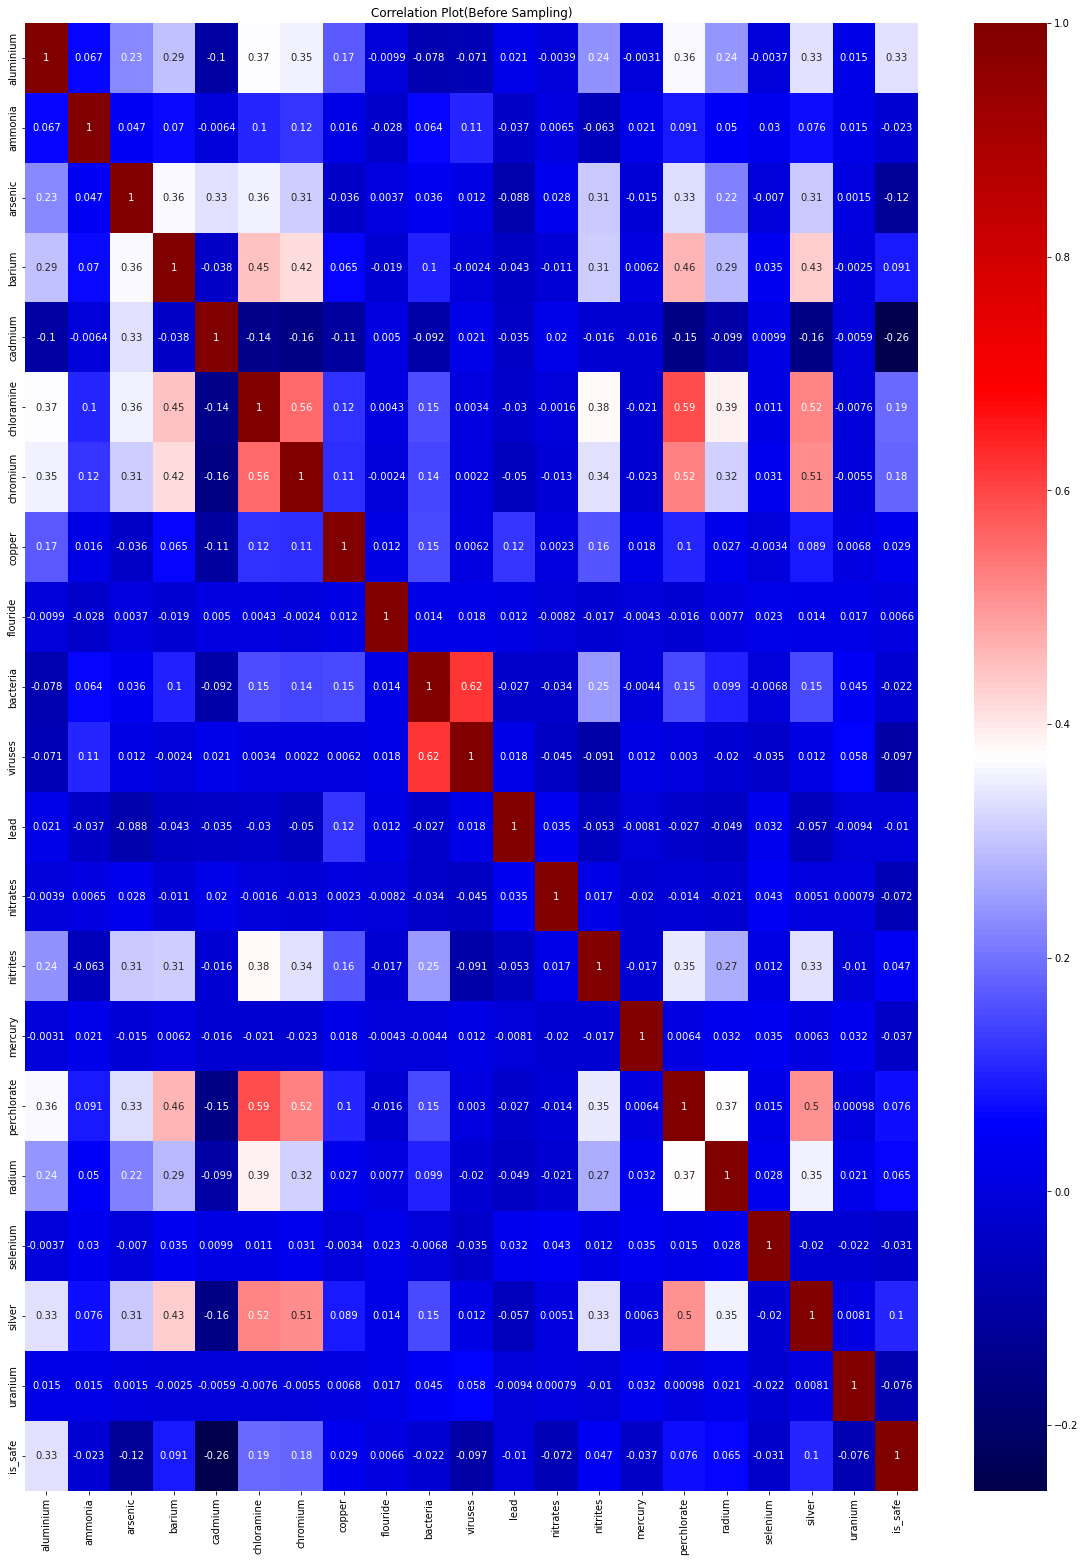

In [12]:
plt.figure(figsize=(20,27))
plt.title("Correlation Plot(Before Sampling)")
sns.heatmap(water_data.corr(), annot = True, cmap = "seismic")
plt.show()

# Inferences



* With a score of 0.62, the features 'bacteria' and 'viruses' have the most positive correlation. This means that as the amount of bacteria in the water increases, so does the amount of viruses. This is closely followed by 'perchlorate' and 'chloramine,' with a correlation value of 0.59, and 'chromium' and 'chloramine', with a correlation value of 0.56.

* The target feature 'is_safe' and cadmium have the strongest negative correlation, with a correlation value of -0.26. This suggests that as the value of cadmium increases, the quality of water decreases, eventually indicating the unsafe(0) class. This is followed by silver and chromium with cadmium, each having a correlation value of -0.16

* The feature aluminium has the strongest positive correlation with the target feature 'is_ safe', with a correlation value of 0.33, implying that as the value of aluminium increases, so does the quality of water, eventually resulting in the safe(1) class.

Text(0.5, 1.0, 'Aluminium vs Cadmium(Before Sampling)')

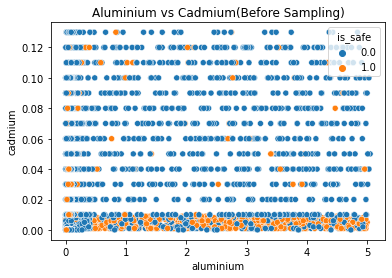

In [13]:
sns.scatterplot(x = "aluminium", y = "cadmium", hue = "is_safe", data =water_data)
plt.title("Aluminium vs Cadmium(Before Sampling)")

In [14]:
X = water_data.drop("is_safe", axis=1)
y = water_data["is_safe"]

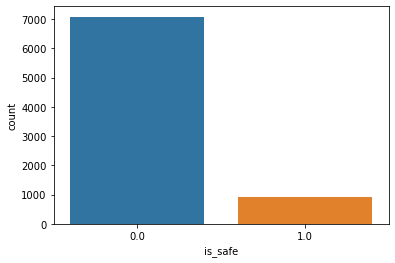

In [15]:
sns.countplot(x="is_safe", data=water_data)
plt.show()

# Data Standardization

In [16]:
scale = StandardScaler()
X_transform= scale.fit_transform(X)

# Splitting Training and Testing Data

In [17]:
X = water_data.drop("is_safe", axis=1)
y = water_data["is_safe"]
X_train,X_test,y_train,y_test = train_test_split(X_transform,y, test_size = 0.3, random_state=42)

In [18]:
X_train = pd.DataFrame(X_train, columns = X.columns)

# Sampling

In [19]:

under = RandomUnderSampler(sampling_strategy=0.7, random_state = 42) 
                     
X_under_sample, y_under_sample = under.fit_resample(X_train, y_train)

In [20]:
X_under_sample = pd.DataFrame(X_under_sample, columns = X.columns)

In [21]:
y_under_sample.value_counts()

0.0    862
1.0    604
Name: is_safe, dtype: int64

In [22]:
df  = pd.concat([X_under_sample,y_under_sample], axis = 1)

In [23]:
df.describe()

aluminium      ammonia      arsenic       barium      cadmium  \
count  1466.000000  1466.000000  1466.000000  1466.000000  1466.000000   
mean      0.297978    -0.007750    -0.146357     0.091183    -0.257485   
std       1.170096     1.004660     0.873598     0.995677     0.981490   
min      -0.526693    -1.617212    -0.639217    -1.289254    -1.187431   
25%      -0.487175    -0.885940    -0.560046    -0.763004    -1.048724   
50%      -0.455561    -0.031336    -0.480875    -0.113413    -0.910016   
75%       0.974993     0.903520    -0.322532     0.889751     0.477060   
max       3.409306     1.748269     3.477692     2.772741     2.418966   

        chloramine     chromium       copper     flouride     bacteria  ...  \
count  1466.000000  1466.000000  1466.000000  1466.000000  1466.000000  ...   
mean      0.151191     0.156208     0.031407     0.000340    -0.025010  ...   
std       1.005221     1.024978     0.983478     0.985115     0.989877  ...   
min      -0.848285    -0.913738    -1.233166    -1.772284    -0.970370  ...   
25%      -0.782061    -0.692046    -1.034254    -0.801904    -0.970370  ...   
50%      -0.184098    -0.285612    -0.039691     0.019188    -0.332994  ...   
75%       1.005984     0.961402     0.893667     0.846021     0.820352  ...   
max       2.525238     2.374684     1.827026     1.672854     2.064753  ...   

              lead     nitrates     nitrites      mercury  perchlorate  \
count  1466.000000  1466.000000  1466.000000  1466.000000  1466.000000   
mean     -0.006199    -0.055732     0.031945    -0.035026     0.046235   
std       0.999815     0.997652     0.929340     0.995661     0.937108   
min      -1.709466    -1.771906    -2.319897    -1.750143    -0.930887   
25%      -0.884225    -0.928292    -0.418408    -0.739005    -0.767921   
50%       0.018382    -0.107234     0.157272    -0.064914    -0.306725   
75%       0.869411     0.815329     0.732952     0.946224     0.725630   
max       1.729036     1.804659     2.442548     1.620315     2.446598   

            radium     selenium       silver      uranium      is_safe  
count  1466.000000  1466.000000  1466.000000  1466.000000  1466.000000  
mean      0.060706    -0.029544     0.069698    -0.070982     0.412005  
std       1.002851     0.999908     1.024492     1.001170     0.492364  
min      -1.257225    -1.726831    -1.029616    -1.660415     0.000000  
25%      -0.878349    -1.031700    -0.750986    -0.917040     0.000000  
50%      -0.111986     0.010997    -0.402699    -0.173665     0.000000  
75%       0.822287     0.706129     0.851134     0.941398     1.000000  
max       2.156964     1.748826     2.453255     1.684773     1.000000  

[8 rows x 21 columns]

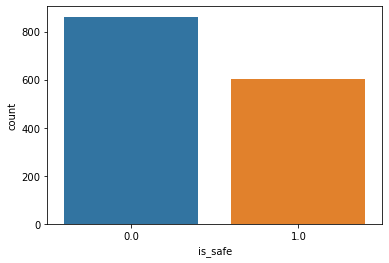

In [24]:
sns.countplot(x="is_safe", data=df)
plt.show()

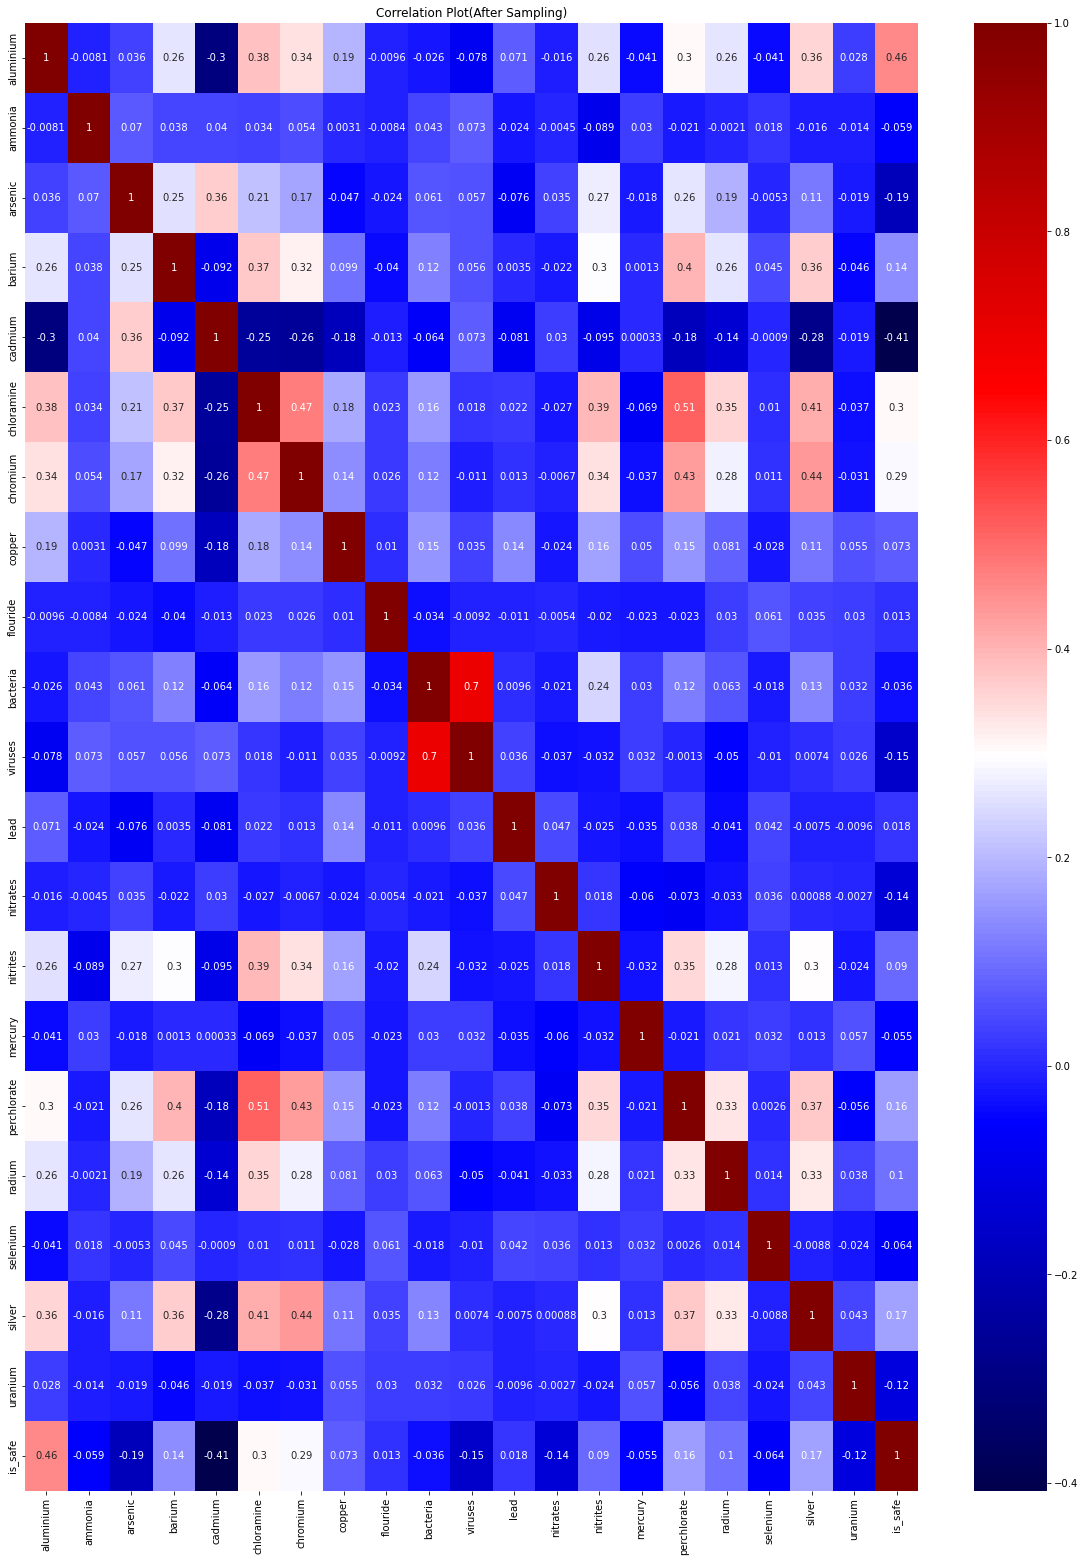

In [25]:
plt.figure(figsize=(20,27))
plt.title("Correlation Plot(After Sampling)")
sns.heatmap(df.corr(), annot = True, cmap = "seismic")
plt.show()

* Even after sampling, with a correlation score of 0.7, the features 'bacteria' and 'viruses' have the most positive correlation. This is closely followed by 'perchlorate' and 'chloramine', with a correlation value of 0.51.

* The target feature 'is_safe' and cadmium have the strongest negative correlation, with a correlation value of -0.41. This is followed by silver and cadmium, having a correlation value of -0.28. 

* The feature aluminium has the strongest positive correlation with the target feature 'is_ safe', with a correlation value of 0.46.

Text(0.5, 1.0, 'Aluminium vs Cadmium(After Sampling)')

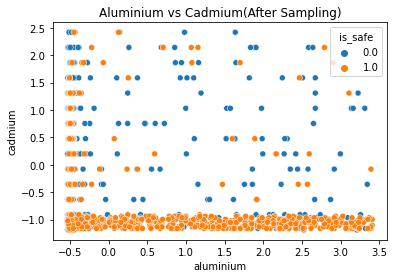

In [26]:
sns.scatterplot(x = "aluminium", y = "cadmium", hue = "is_safe", data = df)
plt.title("Aluminium vs Cadmium(After Sampling)")

# Decision Tree

In [27]:
dec_tree = DecisionTreeClassifier(max_depth = 3)

In [28]:
dec_tree.fit(X_under_sample.values, y_under_sample.values)

DecisionTreeClassifier(max_depth=3)

In [29]:
y_pred_a = dec_tree.predict(X_test)

In [30]:
tn_dt, fp_dt, fn_dt, tp_dt = confusion_matrix(list(y_test), list(y_pred_a), labels=[0,1]).ravel()

print('True Negative:', tn_dt)
print('False Positive:', fp_dt)
print('False Negative:', fn_dt)
print('True Positive:', tp_dt)

True Negative: 1959
False Positive: 132
False Negative: 85
True Positive: 223


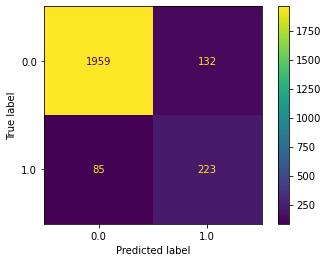

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_a)

In [32]:
a1 = accuracy_score(y_test, y_pred_a)

In [33]:
print("Accuracy:", a1)

Accuracy: 0.9095456440183409


In [34]:
p1 = precision_score(y_test, y_pred_a)

In [35]:
print("Precision:", p1)

Precision: 0.6281690140845071


In [36]:
r1 = recall_score(y_test, y_pred_a)

In [37]:
print("Recall:", r1)

Recall: 0.724025974025974


In [38]:
f1 = f1_score(y_test, y_pred_a)

In [39]:
print("F1-score:", f1)

F1-score: 0.6726998491704375


In [40]:
features = ["aluminium", "ammonia", "arsenic", "barium", "cadmium","chloramine","chromium", "copper", "flouride", "bacteria", "viruses", "lead", "nitrates", "nitrites", "mercury", "perchlorate", "radium", "selenium", "silver", "uranium"]
class_feature = ["0","1"]

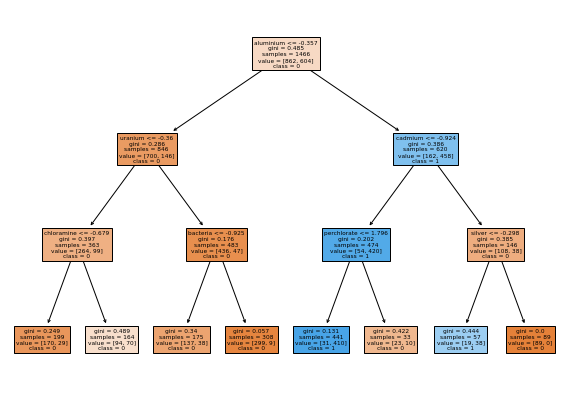

In [41]:
plt.figure(figsize = (10,7))
plot_tree(dec_tree, filled=True, feature_names = features, class_names = class_feature)
plt.show()

# Support Vector Machine

In [42]:
svm_model= SVC(kernel = "linear", random_state = 7)

# trainin of the model
svm_model.fit(X_under_sample.values, y_under_sample.values)

y_pred_b = svm_model.predict(X_test)

In [43]:
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(list(y_test), list(y_pred_b), labels=[0,1]).ravel()


print('True Negative:', tn_svm)
print('False Positive:', fp_svm)
print('False Negative:', fn_svm)
print('True Positive:', tp_svm)

True Negative: 1835
False Positive: 256
False Negative: 104
True Positive: 204


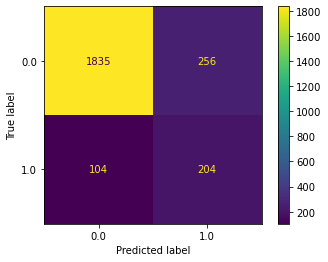

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_b)

In [45]:
a2 = accuracy_score(y_test, y_pred_b)

In [46]:
print("Accuracy:", a2)

Accuracy: 0.8499374739474781


In [47]:
p2 = precision_score(y_test, y_pred_b)

In [48]:
print("Precision:", p2)

Precision: 0.4434782608695652


In [49]:
r2 = recall_score(y_test, y_pred_b)

In [50]:
print("Recall:", r2)

Recall: 0.6623376623376623


In [51]:
f2 = f1_score(y_test, y_pred_b)

In [52]:
print("F1-score:", f2)

F1-score: 0.53125


In [53]:
# Get the supporting hyperplane
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2, 3)
yy = np.linspace(-2, 3)

# Plot the parallels to the supporting hyperplane
# that pass through the support vectors
b = svm_model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = svm_model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

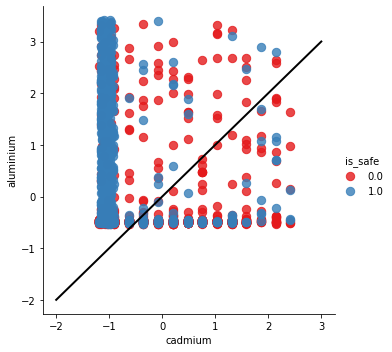

In [54]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Plot the hyperplane
sns.lmplot('cadmium', 'aluminium', data = df, hue = 'is_safe',
          palette = 'Set1', fit_reg= False, scatter_kws={"s":70})
plt.plot(xx, yy, linewidth = 2, color = 'black')

# Naive Bayes Algorithm

In [55]:
naive_bayes = GaussianNB()

In [56]:
naive_bayes.fit(X_under_sample.values , y_under_sample.values)
 
#Predict on test data
y_pred_c = naive_bayes.predict(X_test)

In [57]:
tn_nb, fp_nb, fn_nb, tp_nb = confusion_matrix(list(y_test), list(y_pred_c), labels=[0,1]).ravel()


print('True Negative:', tn_nb)
print('False Positive:', fp_nb)
print('False Negative:', fn_nb)
print('True Positive:', tp_nb)

True Negative: 1631
False Positive: 460
False Negative: 86
True Positive: 222


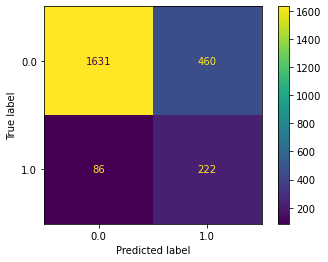

In [58]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_c)

In [59]:
a3 = accuracy_score(y_test, y_pred_c)

In [60]:
print("Accuracy:", a3)

Accuracy: 0.7724051688203418


In [61]:
p3 = precision_score(y_test, y_pred_c)

In [62]:
print("Precision:",p3 )

Precision: 0.3255131964809384


In [63]:
r3 = recall_score(y_test, y_pred_c)

In [64]:
print("Recall:", r3)

Recall: 0.7207792207792207


In [65]:
f3 = f1_score(y_test, y_pred_c)

In [66]:
print("F1-score:", f3)

F1-score: 0.4484848484848485


# Logistic Regression

In [67]:
log_reg = LogisticRegression()

In [68]:
log_reg.fit(X_under_sample.values, y_under_sample.values)

#Making Predictions
log_reg.predict(X_test)
y_pred_d = log_reg.predict(X_test)

In [69]:
tn_logr, fp_logr, fn_logr, tp_logr = confusion_matrix(list(y_test), list(y_pred_d), labels=[0,1]).ravel()


print('True Negative:', tn_logr)
print('False Positive:', fp_logr)
print('False Negative:', fn_logr)
print('True Positive:', tp_logr)

True Negative: 1806
False Positive: 285
False Negative: 103
True Positive: 205


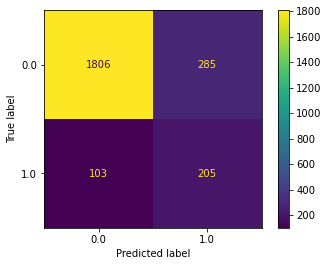

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_d)

In [71]:
a4 = accuracy_score(y_test, y_pred_d)

In [72]:
print("Accuracy:", a4)

Accuracy: 0.8382659441433931


In [73]:
p4 = precision_score(y_test, y_pred_d)

In [74]:
print("Precision:", p4)

Precision: 0.41836734693877553


In [75]:
r4 = recall_score(y_test, y_pred_d)

In [76]:
print("Recall:", r4)

Recall: 0.6655844155844156


In [77]:
f4 = f1_score(y_test, y_pred_d)

In [78]:
print("F1-score:", f4)

F1-score: 0.5137844611528822


# K- Nearest Neighbor

In [79]:
knnclassifier = KNeighborsClassifier(metric='minkowski', n_neighbors=5, p=2)
knnclassifier.fit(X_under_sample.values, y_under_sample.values)

KNeighborsClassifier()

In [80]:
y_pred_e = knnclassifier.predict(X_test)

In [81]:
tn_knn, fp_knn, fn_knn, tp_knn = confusion_matrix(list(y_test), list(y_pred_e), labels=[0,1]).ravel()


print('True Negative:', tn_knn)
print('False Positive:', fp_knn)
print('False Negative:', fn_knn)
print('True Positive:', tp_knn)

True Negative: 1651
False Positive: 440
False Negative: 50
True Positive: 258


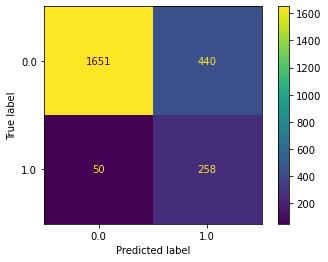

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_e)

In [83]:
a5 = accuracy_score(y_test, y_pred_e)

In [84]:
print("Accuracy:", a5)

Accuracy: 0.7957482284285119


In [85]:
p5 = precision_score(y_test, y_pred_e)

In [86]:
print("Precision:", p5)

Precision: 0.36962750716332377


In [87]:
r5 = recall_score(y_test, y_pred_e)

In [88]:
print("Recall:", r5)

Recall: 0.8376623376623377


In [89]:
f5 = f1_score(y_test, y_pred_e)

In [90]:
print("F1-score:", f5)

F1-score: 0.5129224652087475


# XgBoost

In [91]:

Xg_model = GradientBoostingClassifier()

In [92]:
Xg_model.fit(X_under_sample.values, y_under_sample.values)

GradientBoostingClassifier()

In [93]:
y_pred_f = Xg_model.predict(X_test)

In [94]:
tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix(list(y_test), list(y_pred_f), labels=[0,1]).ravel()


print('True Negative:', tn_xgb)
print('False Positive:', fp_xgb)
print('False Negative:', fn_xgb)
print('True Positive:', tp_xgb)

True Negative: 1951
False Positive: 140
False Negative: 24
True Positive: 284


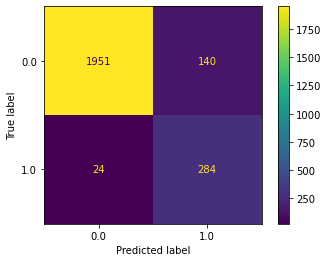

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_f)

In [96]:
a6 = accuracy_score(y_test, y_pred_f)

In [97]:
print("Accuracy:", a6)

Accuracy: 0.9316381825760733


In [98]:
p6 = precision_score(y_test, y_pred_f)

In [99]:
print("Precision:", p6)

Precision: 0.6698113207547169


In [100]:
r6 = recall_score(y_test, y_pred_f)

In [101]:
print("Recall:", r6)

Recall: 0.922077922077922


In [102]:
f6 = f1_score(y_test, y_pred_f)

In [103]:
print("F1-score:", f6)

F1-score: 0.7759562841530054


# Comparing FP Values of Models

Decision Tree 132
Support Vector Machine 256
Naive Bayes 460
Logistic Regression 285
K Nearest Neighbor 440
XgBoost 140


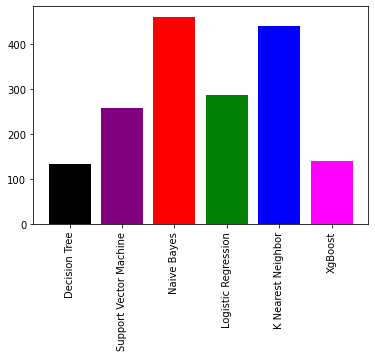

In [104]:
fp_models = {"Decision Tree": fp_dt, "Support Vector Machine":fp_svm, "Naive Bayes":fp_nb, "Logistic Regression": fp_logr, 
            "K Nearest Neighbor":fp_knn, "XgBoost": fp_xgb}
for key, value in fp_models.items():
    print (key, value)
    
fp_keys = list(fp_models.keys())
fp_values = list(fp_models.values())

plt.bar(range(len(fp_models)), fp_values, tick_label=fp_keys,color=['black','purple', 'red', 'green', 'blue', 'magenta'])
plt.xticks(rotation = 90)
plt.show()

#  Comparing Performance of Models

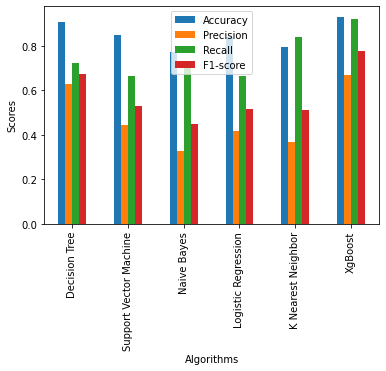

<Figure size 1080x1368 with 0 Axes>

In [105]:

models_data = pd.DataFrame([['Decision Tree', a1, p1, r1, f1], ['Support Vector Machine', a2, p2, r2, f2],['Naive Bayes', a3, p3, r3, f3],
                           ['Logistic Regression', a4, p4, r4, f4],['K Nearest Neighbor', a5, p5, r5, f5],['XgBoost', a6, p6, r6, f6]],
                          columns = ['Scores','Accuracy', 'Precision', 'Recall', 'F1-score'])

models_data.plot(x='Scores', kind ='bar', stacked = False, xlabel = 'Algorithms', ylabel = 'Scores')
plt.figure(figsize = (15, 19))
plt.show()
